# Exercise 2

### Part 1

Our objective is to solve the nonlinear equation $2xe^x = 1$

We observed in a) that we can rewrite this as $x = \frac{1}{2}e^{-x}$
This is a fixed point problem, and we can solve it using the fixed point iteration method.


      

In [42]:
import numpy as np 


def fixed_point_iteration(x):
    return 0.5 * np.exp(-x)

x0 = 1

x1 = fixed_point_iteration(x0)
x2 = fixed_point_iteration(x1)
x3 = fixed_point_iteration(x2)

print(f"x0 = {x0}")
print(f"x1 = {x1}")
print(f"x2 = {x2}")
print(f"x3 = {x3}")

x0 = 1
x1 = 0.18393972058572117
x2 = 0.4159929769705693
x3 = 0.32984245172730614


In [55]:
# Perfom this fixed point iteration 10 times and plot

x = 1
for i in range(10):
    x = fixed_point_iteration(x)
    print(f"x{i} = {x}")




x0 = 0.18393972058572117
x1 = 0.4159929769705693
x2 = 0.32984245172730614
x3 = 0.35951850377358163
x4 = 0.3490061677382172
x5 = 0.3526943898016018
x6 = 0.3513959704727758
x7 = 0.3518525261291117
x8 = 0.3516919225331412
x9 = 0.3517484100565021


### Exercise 2 Part 2

We now want so solve the system $x^2-2 =0 , x > 0$

In part (a) i rewrote the equation as $x = \frac{2}{x}$ so we can perform a fix point iteration


For x0 = 1:  [1, 2.0, 1.0, 2.0]
For x0 = 2:  [2, 1.0, 2.0, 1.0]


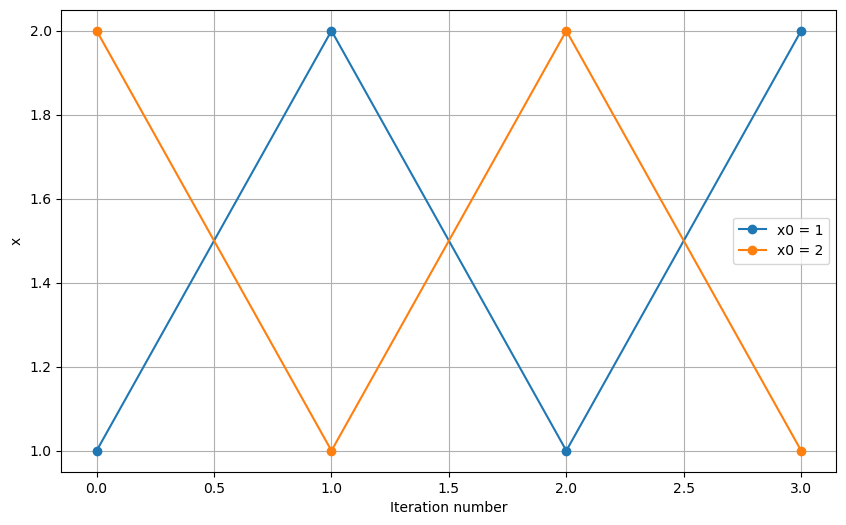

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2/x  # fixed point equation derived from x^2 - 2 = 0

def fixed_point_iteration(x_0, max_iter=10):
    """ 
    Function that performes the fixed point iteration

    x_0 = initial guess
    max_iter = maximum number of iterations
    """
    x_values = [x_0]
    for i in range(max_iter):
        x_n_plus_1 = f(x_values[-1])
        x_values.append(x_n_plus_1)
    return x_values

# Choose the two starting points
x0_1 = 1
x0_2 = 2

x_values_1 = fixed_point_iteration(x0_1,max_iter=3)
x_values_2 = fixed_point_iteration(x0_2,max_iter=3)

print("For x0 = 1: ", x_values_1)
print("For x0 = 2: ", x_values_2)

# Plot the results

plt.figure(figsize=(10,6))
plt.plot(range(len(x_values_1)), x_values_1, marker='o', label=f'x0 = {x0_1}')
plt.plot(range(len(x_values_2)), x_values_2, marker='o', label=f'x0 = {x0_2}')
plt.xlabel('Iteration number')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.show()

### Exercise 2 Part 3

We still want to solve the system $x^2-2 =0 , x > 0$

Now we consider $f(x) = \frac{x^2 + 2}{2x}$ which is also a fixed point problem



For x0 = 1:  [1, 1.5, 1.4166666666666667, 1.4142156862745099]
For x0 = 2:  [3, 1.8333333333333333, 1.4621212121212122, 1.414998429894803]


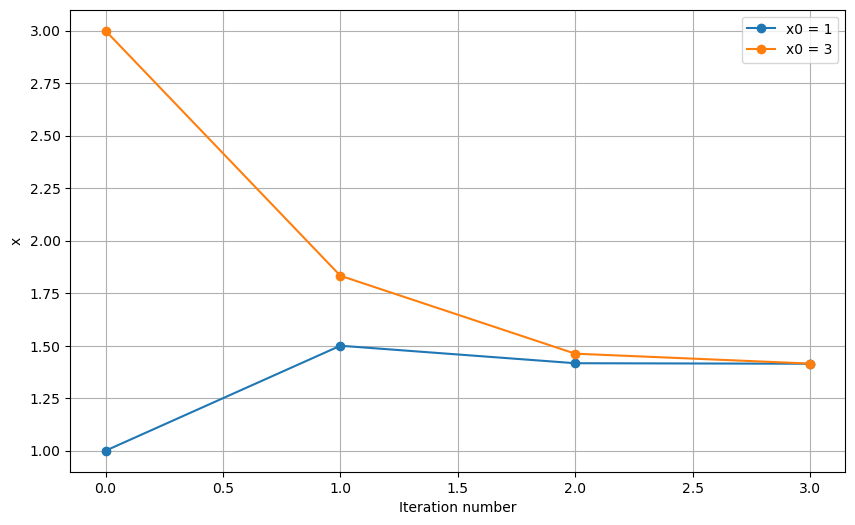

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (x**2 + 2) / (2*x)

def fixed_point_iteration(x_0, max_iter=10):
    x_values = [x_0]
    for i in range(max_iter):
        x_n_plus_1 = f(x_values[-1])
        x_values.append(x_n_plus_1)
    return x_values

x0_1 = 1
x0_2 = 3

x_values_1 = fixed_point_iteration(x0_1,max_iter=3)
x_values_2 = fixed_point_iteration(x0_2,max_iter=3)

print("For x0 = 1: ", x_values_1)
print("For x0 = 2: ", x_values_2)

plt.figure(figsize=(10,6))
plt.plot(range(len(x_values_1)), x_values_1, marker='o', label=f'x0 = {x0_1}')
plt.plot(range(len(x_values_2)), x_values_2, marker='o', label=f'x0 = {x0_2}')
plt.xlabel('Iteration number')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.show()

# Exercise 3

Given the nonlinear system

+ $x^2 + 2xy = 0$ 
+ $xy + 1 = 0$

**Task:** Solve the system in Python using Newtons's method and give the conditions under which the Newton sequence is well defined

## The Algorithm

Given $x^{(0)}$ solve $f'(x^{(0)})\cdot \Delta x^{(k)} = -f(x^{(x)})$, where $f'(x)$ is the Jacobian matrix

We define a sequence by:

$\Phi(x):= x - [f'(x^{0})]^{-1}f(x)$


### The Jacobian Matrix

$f'(x) = \begin{bmatrix} \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\ \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} \end{bmatrix}$  

In [30]:
import numpy as np

def newton_method(F,J,x_0,tol=1e-6,nmax=10):
    """ 
    Newtons-Methode for Solving a Nonlinear Equation
    """

    x = np.array(x0,dtype=float)

    num_it = 0
    err = np.inf

    while err > tol and num_it < nmax:
        Fx = F(x)
        Jx = J(x)
        # Solves the matrix equation
        dx = np.linalg.solve(Jx,-Fx)
        print(dx)
        x = x + dx 
        err = np.linalg.norm(dx)
        num_it += 1
        print("Iteration: ", num_it, "x = ", x, "err = ", err)

    return x,num_it


def F(x):
    """ 
    The nonlinear sytem we are looking at in this exercise
    """
    return np.array([x[0]**2 + 2*x[0]*x[1], x[0]*x[1]+1])

def J(x):
    """
    The Jacobian Matrix used in this exercise
    """
    return np.array([[2*x[0]+2*x[1], 2*x[0]], [x[1], x[0]]])


x0 = [1,-1]

solution, iterations = newton_method(F,J,x0)

# Print the theoretical solutions

print("-----------------------------------")
print(f"Theoretical solution I = (x,y) = ({np.sqrt(2)}, {-1/np.sqrt(2)} )")
print(f"Theoretical solution II = (x,y) = ({-np.sqrt(2)}, {1/np.sqrt(2)})")



[0.5 0.5]
Iteration:  1 x =  [ 1.5 -0.5] err =  0.7071067811865476
[-0.08333333 -0.19444444]
Iteration:  2 x =  [ 1.41666667 -0.69444444] err =  0.21154925294066412
[-0.00245098 -0.01263937]
Iteration:  3 x =  [ 1.41421569 -0.70708381] err =  0.012874819049788964
[-2.12389982e-06 -2.29672335e-05]
Iteration:  4 x =  [ 1.41421356 -0.70710678] err =  2.306522851867683e-05
[-1.59474291e-12 -3.52901046e-11]
Iteration:  5 x =  [ 1.41421356 -0.70710678] err =  3.532611909985165e-11
-----------------------------------
Theoretical solution I = (x,y) = (1.4142135623730951, -0.7071067811865475 )
Theoretical solution II = (x,y) = (-1.4142135623730951, 0.7071067811865475)


#### When is the newton sequence well defined?

This can be answered by looking at the Jacobian matrix.

$J(x) = \begin{bmatrix} 2x + 2y & 2x \\ y & x \end{bmatrix}$

The determinant of the Jacobian matrix is $2x^2 + 2xy - 2xy = 2x^2$

So obviously the sequence is well defined when $x \neq 0$

# Exercise 4 

We consider the application

$f: \mathbb{R} \to \mathbb{R}: x \to x^2$


### Write Newtons algorithm to find the zeros of $f$

So $f(x)$ is differentiable, we can approximate $f(x)$ by a tangent line at $x_0$

$y = f'(x_0)(x-x_0) + f(x_0)$

The intercept with $x$ is then the solution $x_1$ of

$0 = f'(x_0)(x_1 - x_0) + f(x_0)$

$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$


This gives us the recursive Newton Formula 

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$


In [31]:
def newton(f,Df,x0,tol,max_it=100):
    """  
    Approximates the solution f(x)=0 by using Newtons Method

    Parameters:

    f : function
        The function we want to find the root of
    Df : function
        The derivative of the function f
    x_0 : float
        The initial guess
    tol : float
        The tolerance
    max_it : int   
        The maximum number of iterations
    """

    xn = x0
    approximations = [xn]
    for i in range(0,max_it):
        fxn = f(xn)
        if abs(fxn) < tol:
            print("Found solution after", i, "iterations")
            return xn, approximations
        Dfxn = Df(xn)
        if Dfxn == 0:
            print("Derivative is zero")
            return None, approximations
        xn = xn - fxn/Dfxn
        approximations.append(xn)
    print("Exceeded maximum number of iterations, No solutions found")
    return None

f = lambda x: x**2 
Df = lambda x: 2*x
approx, approximations = newton(f,Df,10,1e-10,50)

print("Approximated Solution: ")

Found solution after 20 iterations
Approximated Solution: 


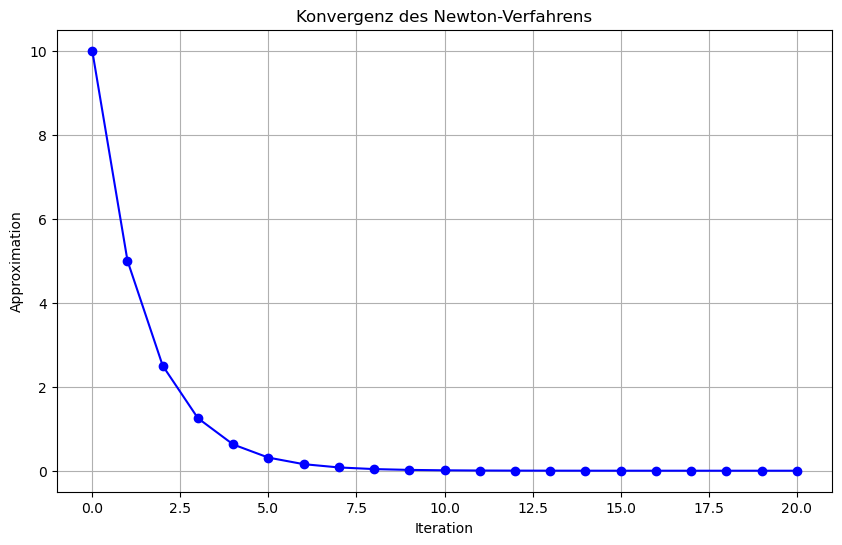

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(approximations, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Approximation')
plt.title('Konvergenz des Newton-Verfahrens')
plt.grid(True)
plt.show()